In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target


In [42]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=4)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(len(y_test))

30


In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[15  1  0]
 [ 0  4  1]
 [ 0  1  8]]


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.67      0.80      0.73         5
           2       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.85      0.88      0.86        30
weighted avg       0.91      0.90      0.90        30



In [59]:
import numpy as np
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print(len(error)) 
print(len(y_test))
error

39
30


[0.1,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.1,
 0.13333333333333333,
 0.13333333333333333]

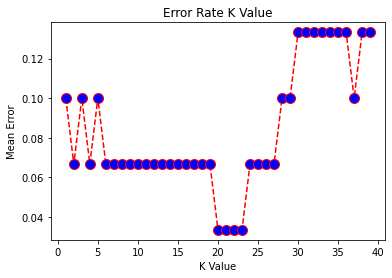

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()